In [2]:
import pickle
import numpy as np
from itertools import islice
import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.set_theme(style="whitegrid")
%matplotlib inline

In [6]:
sdsp_data = pd.read_csv("../auc_data_SDSP.csv",index_col=0)
light_data = pd.read_csv("../../auc_data_lightgbm.csv",index_col=0)
rf_data = pd.read_csv("../../auc_data_rf.csv",index_col=0)
svm_data = pd.read_csv("../../auc_data_svc.csv",index_col=0)
mlp_data = pd.read_csv("../../auc_data_mlp.csv",index_col=0)
print(light_data.shape)
mlp_data.head()

(968, 2)


,label,predict
0,0.0,0.057589
1,0.0,0.479983
2,0.0,0.894070
3,1.0,0.850448
4,0.0,0.707215


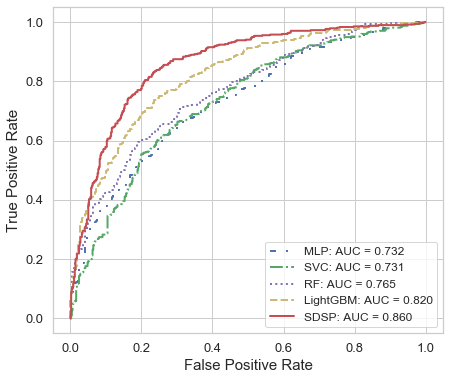

In [16]:
from sklearn import metrics
fpr_1, tpr_1, threshold_1 = metrics.roc_curve(np.array(mlp_data["label"]), np.array(mlp_data["predict"]))
fpr_2, tpr_2, threshold_2 = metrics.roc_curve(np.array(svm_data["label"]), np.array(svm_data["predict"]))
fpr_3, tpr_3, threshold_3 = metrics.roc_curve(np.array(rf_data["label"]), np.array(rf_data["predict"]))
fpr_4, tpr_4, threshold_4 = metrics.roc_curve(np.array(light_data["label"]), np.array(light_data["predict"]))
fpr_5, tpr_5, threshold_5 = metrics.roc_curve(np.array(sdsp_data["label"]), np.array(sdsp_data["predict"]))
roc_auc_1 = metrics.auc(fpr_1, tpr_1)
roc_auc_2 = metrics.auc(fpr_2, tpr_2)
roc_auc_3 = metrics.auc(fpr_3, tpr_3)
roc_auc_4 = metrics.auc(fpr_4, tpr_4)
roc_auc_5 = metrics.auc(fpr_5, tpr_5)
plt.figure(figsize=(7,6))
# plt.title('ROC')
plt.plot(fpr_1, tpr_1, 'b', label = 'MLP: AUC = %0.3f' % roc_auc_1,linestyle=(0, (3, 5, 1, 5, 1, 5)), linewidth=2)
plt.plot(fpr_2, tpr_2, 'g', label = 'SVC: AUC = %0.3f' % roc_auc_2,linestyle='-.', linewidth=2)
plt.plot(fpr_3, tpr_3, 'm', label = 'RF: AUC = %0.3f' % roc_auc_3,linestyle=':', linewidth=2)
plt.plot(fpr_4, tpr_4, 'y', label = 'LightGBM: AUC = %0.3f' % roc_auc_4,linestyle='--', linewidth=2)
plt.plot(fpr_5, tpr_5, 'r', label = 'SDSP: AUC = %0.3f' % roc_auc_5,linestyle='-', linewidth=2)

# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.legend(loc="lower right",fontsize=12)
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig("auc.png",dpi=500)
plt.show()